In [1]:
using PyPlot
using Images
using LinearAlgebra

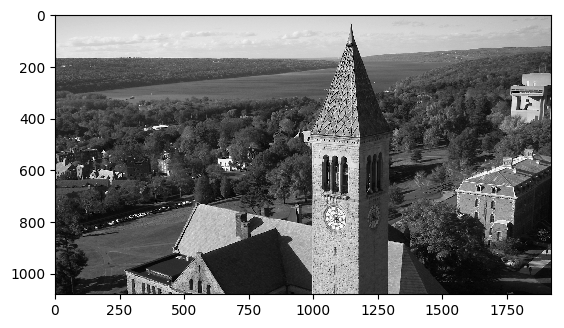

In [2]:
A = Float64.(Gray.(load("cornell.jpg")))
PyPlot.imshow(A, cmap="gray");

In [3]:
function rank_k_approx(A, k)
    F = svd(A)  # thin SVD by default
    Ak = F.U[:, 1:k] * Diagonal(F.S[1:k]) * F.V[:, 1:k]'
    return Ak
end

rank_k_approx (generic function with 1 method)

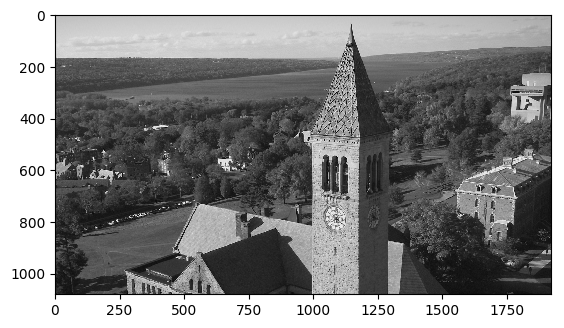

In [4]:
PyPlot.imshow(rank_k_approx(A, 500), cmap="gray");

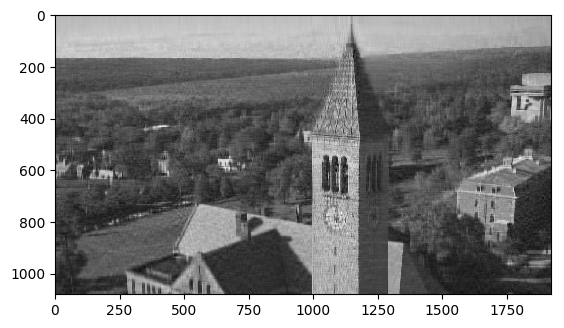

In [5]:
PyPlot.imshow(rank_k_approx(A, 50), cmap="gray");

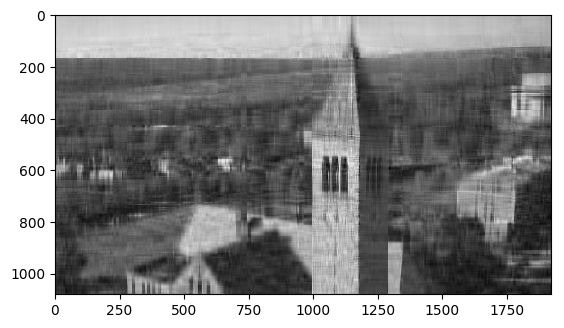

In [6]:
PyPlot.imshow(rank_k_approx(A, 20), cmap="gray");

In [7]:
using CSV
using DataFrames

In [8]:
df = CSV.File("wdbc.data", header=0) |> DataFrame

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9
,Int64,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001
2,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869
3,84300903,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974
4,84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414
5,84358402,M,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198
6,843786,M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578
7,844359,M,18.25,19.98,119.6,1040.0,0.09463,0.109,0.1127
8,84458202,M,13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366
9,844981,M,13.0,21.82,87.5,519.8,0.1273,0.1932,0.1859


In [9]:
# Data matrix (rows are data points)
X = Matrix(df[:, 3:end])

# Scale each data point to have unit 2-norm
for i = 1:size(X, 1)
    X[i, :] /= norm(vec(X[i, :]), 2)  # (slow row-wise)
end
;

In [10]:
# Embedding: U2 = U[:, 1:2] * Sigma[1:2, 1:2] = X * V[:, 1:2]
U2 = X * svd(X).V[:, 1:2]

569×2 Array{Float64,2}:
 -0.977865   0.205099
 -0.99576    0.0861479
 -0.997228   0.0675063
 -0.997282   0.0428917
 -0.998062  -0.00108183
 -0.996014   0.0801129
 -0.995004   0.098695
 -0.99589    0.0868955
 -0.998785   0.0410428
 -0.997279   0.0602852
 -0.997927   0.0631607
 -0.992149   0.12379
 -0.998088  -0.0177512
  ⋮         
 -0.995337  -0.0525748
 -0.997578  -0.0615653
 -0.99806   -0.0555423
 -0.999064  -0.0389898
 -0.996901  -0.0696755
 -0.999823  -0.00196773
 -0.998235   0.0444868
 -0.996981   0.0572709
 -0.997909   0.052592
 -0.999488   0.0212825
 -0.997443   0.06884
 -0.990652   0.0172766

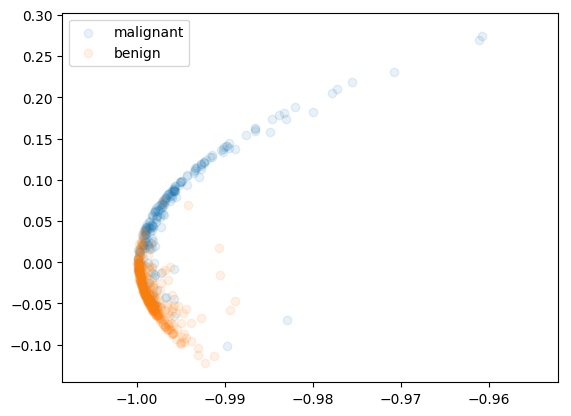

In [11]:
inds_M = findall(df[:, 2] .== "M")
inds_B = findall(df[:, 2] .== "B")
scatter(U2[inds_M,1], U2[inds_M,2], alpha=0.1, label="malignant") 
scatter(U2[inds_B,1], U2[inds_B,2], alpha=0.1, label="benign")
legend()
;